# Exploratory Analysis and Pre-Modeling XAI on the Student Dropout Dataset

We consider the Students’ Dropout and Academic Success dataset from the UCI Machine Learning Repository.  This dataset contains records for 4,424 undergraduate students, with 36 features capturing a broad range of attributes (demographics, socio-economic factors, prior academics, etc.) and no missing values. 

> The prediction task is a three-class classification: determining whether each student ultimately **“dropout”**, **“enrolled”**, or **“graduate”** by the end of their degree’s normal duration

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_numeric_dtype

In [5]:
# read csv file with semicolon separator
df = pd.read_csv('data.csv', sep=';')
df['Target'] = df['Target'].map({0: 'Dropout', 1: 'Enrolled', 2: 'Graduate'})  # Map class names
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,NaN
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,NaN
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,NaN
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,NaN
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,NaN


The dataset was collected to enable early identification of at-risk students, including information available at enrollment (e.g. academic background, demographics, socio-economic status) and academic performance after the 1st and 2nd semesters.

These features can be grouped into several categories:

- Demographic data;

- Socio-economic data;

- Macro-economic data;

- Academic data at enrollment;

- Academic data at the end of 1st semester;

- Academic data at the end of 2nd semester;

- Target;

Lets see how they behave
    

In [47]:
sns.set(style="whitegrid", palette="pastel")

def explore_variable(df, var, target='Target', bins=30, show_stats=True):
    import seaborn as sns
    import matplotlib.pyplot as plt
    import numpy as np
    from pandas.api.types import is_numeric_dtype

    series = df[var]
    n_unique = series.nunique()
    is_numeric = is_numeric_dtype(series)

    # ---- Optional: Summary Stats ----
    if show_stats:
        print(f'\n📌 Variable: {var}')
        print(series.describe())
        if is_numeric and series.mean() != 0:
            coeff_var = series.std() / series.mean()
            print(f'Coefficient of Variation: {coeff_var:.3f}')
        print(f'\n🎯 Mean per {target} class:\n{df.groupby(target)[var].mean()}')
        print('-' * 60)

    # ---- Plotting ----
    plt.figure(figsize=(16, 5))

    # LEFT: Overall Distribution
    plt.subplot(1, 2, 1)
    if is_numeric and n_unique > 10:
        sns.histplot(series, bins=bins, kde=True)
    else:
        sns.countplot(x=var, data=df, order=sorted(df[var].unique()))
    plt.title(f'{var} Distribution')

    # RIGHT: Distribution by Target Class
    

    plt.tight_layout()
    plt.show()


## Demographic data

Basic student characteristics such as gender, age at enrollment, marital status, nationality, and whether the student is studying in their home region or is “displaced” (relocated)

In [46]:
demographic_vars = {
    'Marital status': 'bar',
    'Nacionality': 'bar',
    'Displaced': 'bar',
    'Gender': 'bar',
    'Age at enrollment': 'hist',
    'International': 'bar',
}

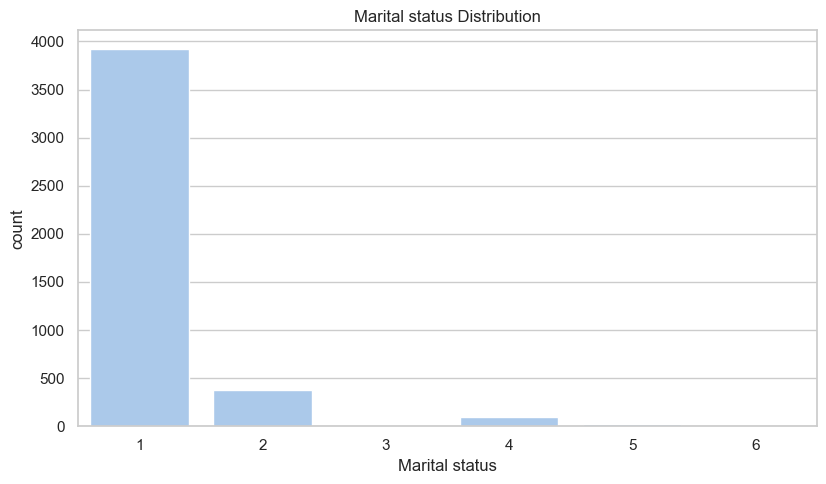

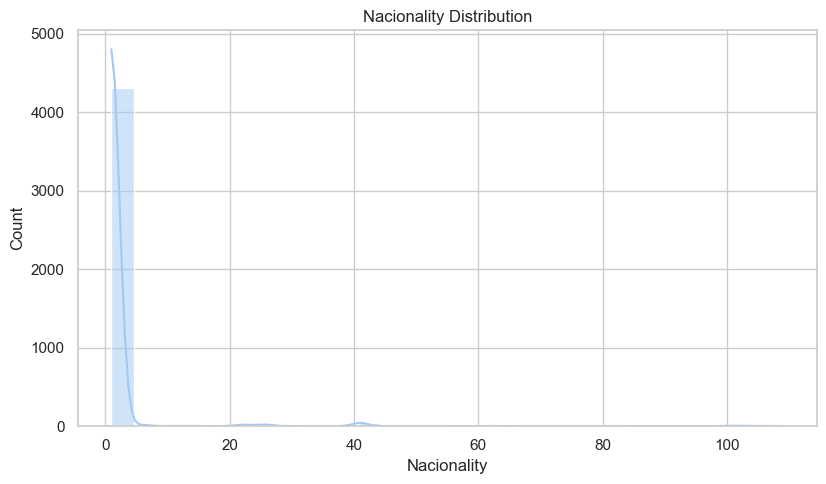

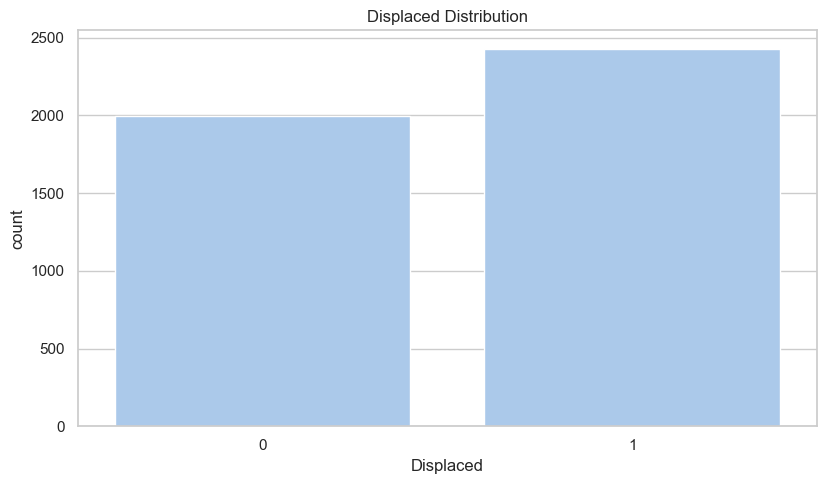

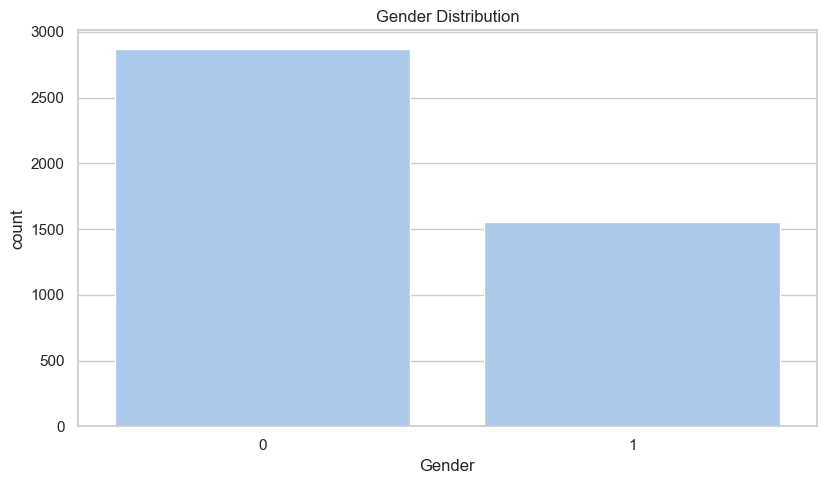

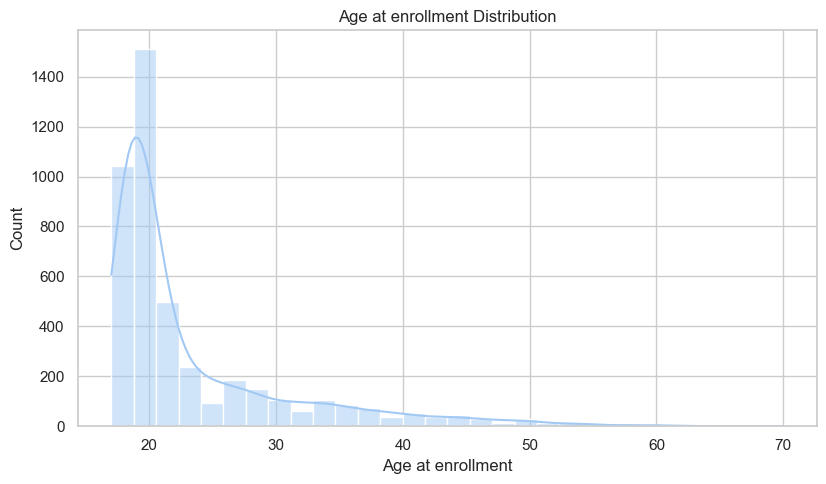

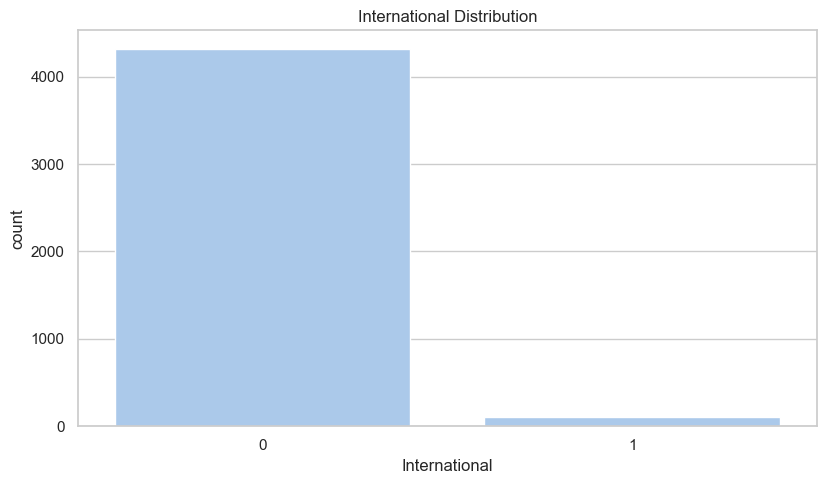

In [48]:
for var in demographic_vars:
    explore_variable(df, var, show_stats=False)


 <<<<<<<<<<<<<<<<<TIRAR CONCLUSÕES, SIGA>>>>>>>>>>>>>>>>>

## Academic Background (Enrollment)

Information about the student’s entry into the program – including previous qualification level (e.g. high school, prior degree), their admission grade (entry exam score or prior GPA), the degree program (course) chosen, and application details (application mode and order of preference) 

In [54]:
academic_background_vars = {
    'Application mode': 'bar',
    'Application order': 'hist',
    'Course': 'bar',
    'Daytime/evening attendance\t': 'bar',
    'Previous qualification': 'bar',
}

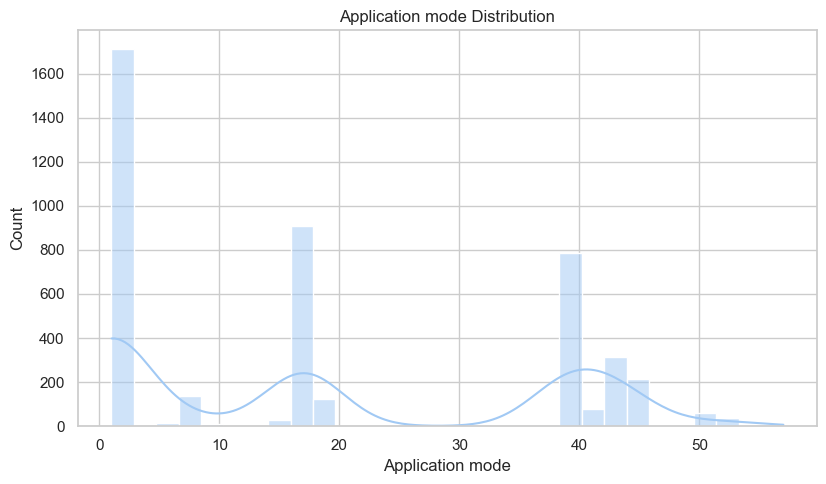

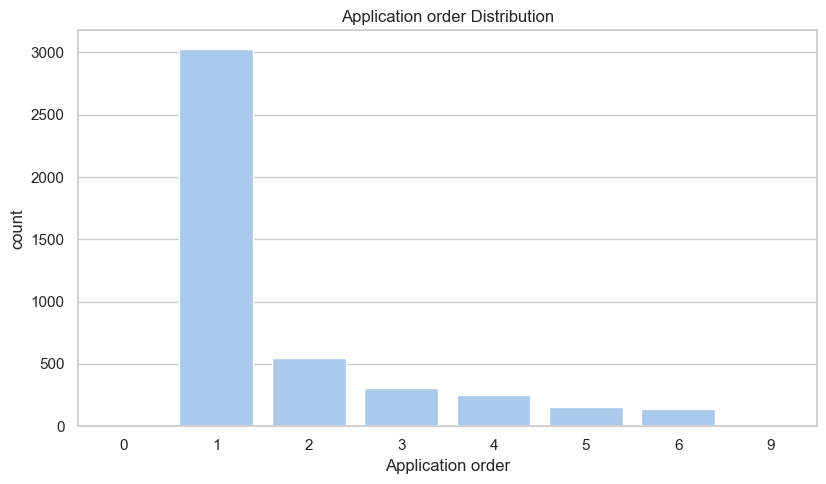

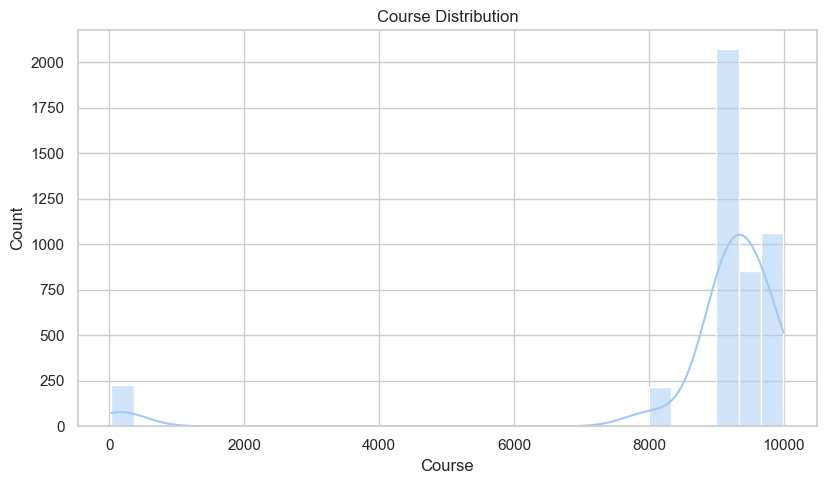

/var/folders/z0/pm53wfh91kxgn3slf8sv896r0000gn/T/ipykernel_6816/1497786103.py:37: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  plt.tight_layout()
/Users/gjoli/Desktop/uni/TAAC/taac_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


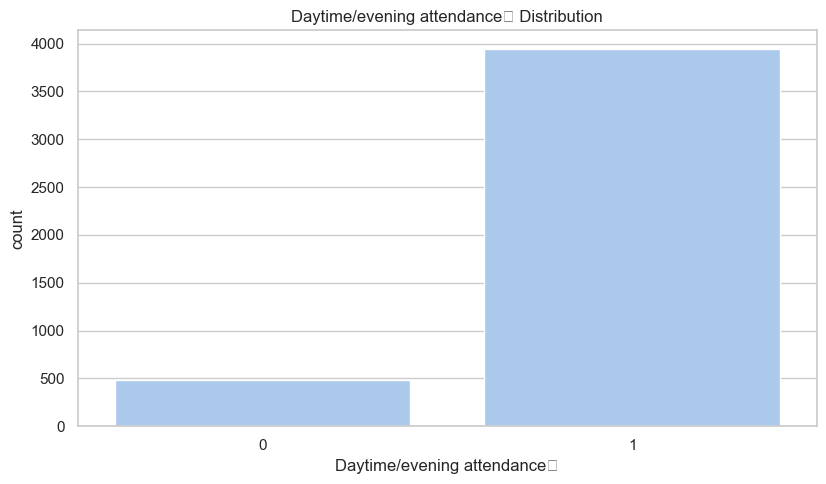

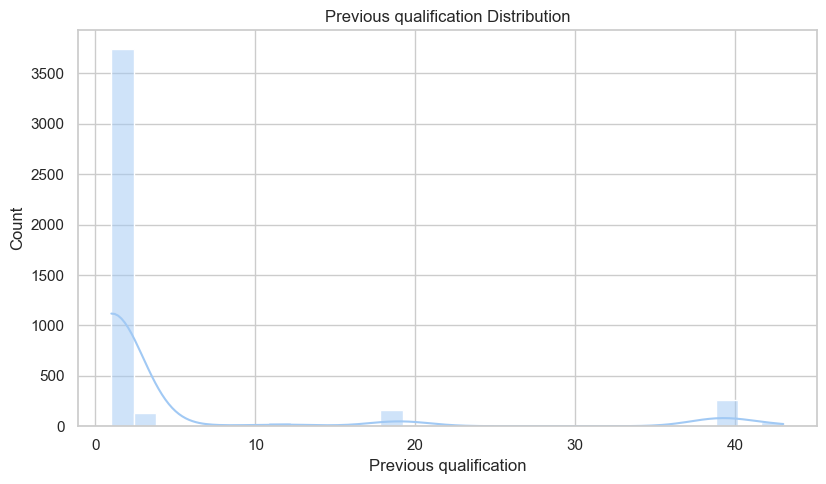

In [55]:
for var in academic_background_vars:
    explore_variable(df, var, show_stats=False)

## Socio-Economic Factors


Features capturing the student’s home and financial situation. This includes parents’ education and occupation levels, whether the student has any special educational needs, and crucial financial indicators like scholarship holder status (about 25% received a scholarship) and whether the student is a tuition fee debtor (about 1.2% had overdue fees) .


In [56]:
socio_economic_vars = {
    "Father's qualification": 'bar',
    "Mother's qualification": 'bar',
    "Father's occupation": 'bar',
    "Mother's occupation": 'bar',
    'Educational special needs': 'bar',
    'Debtor': 'bar',
    'Tuition fees up to date': 'bar',
    'Scholarship holder': 'bar',
}


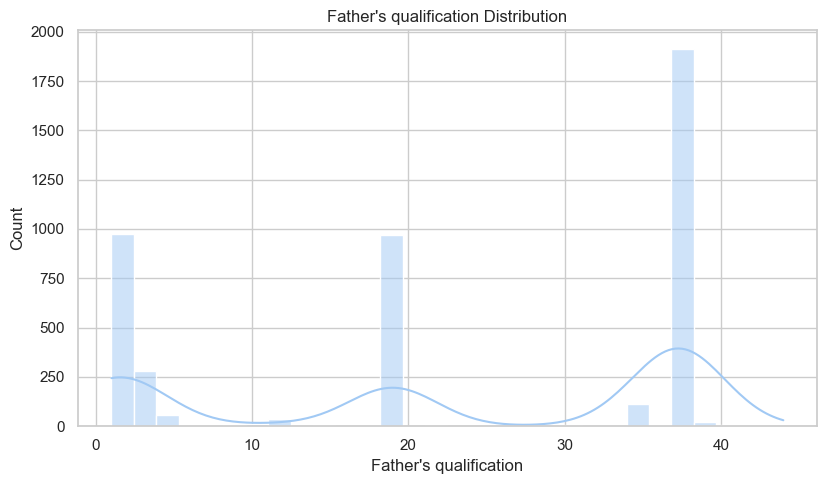

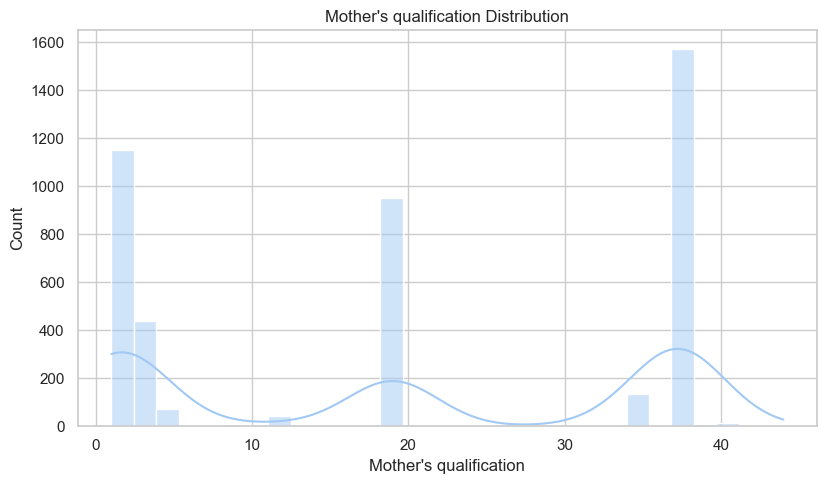

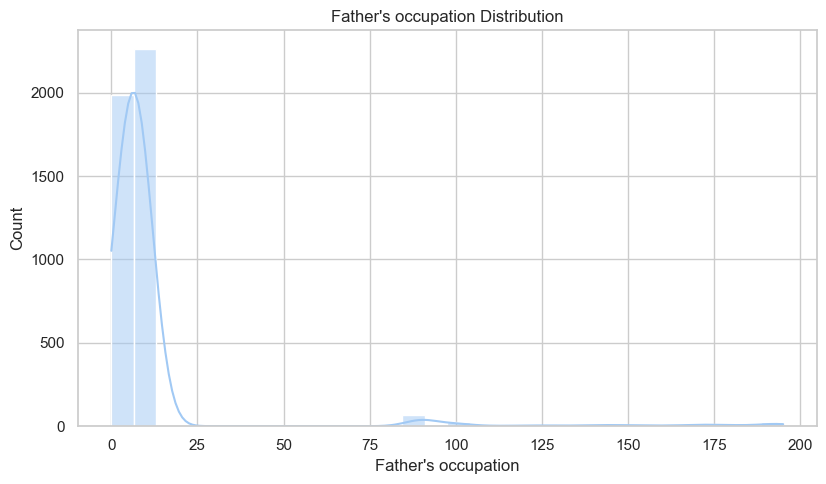

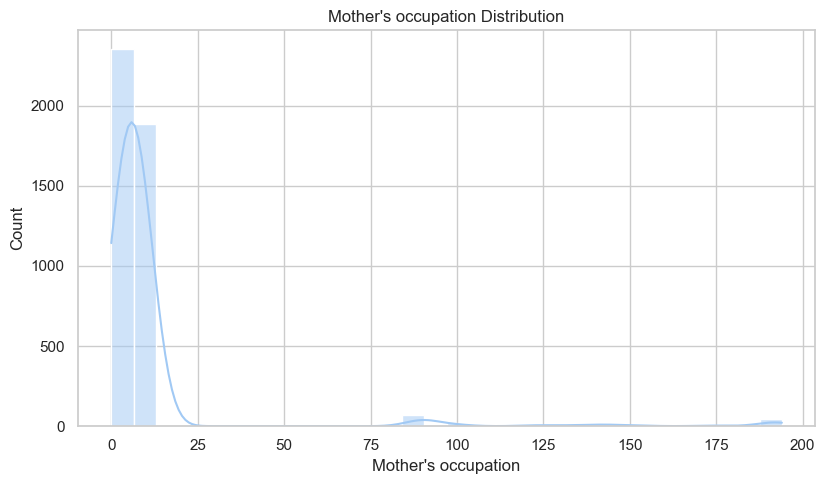

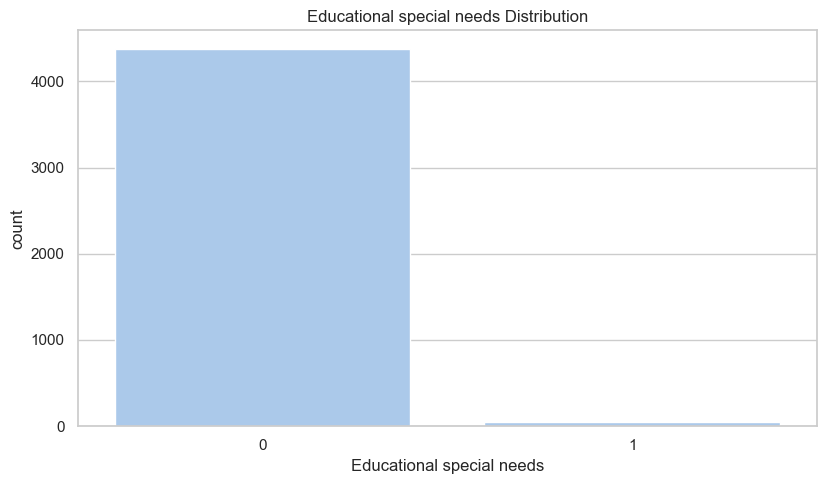

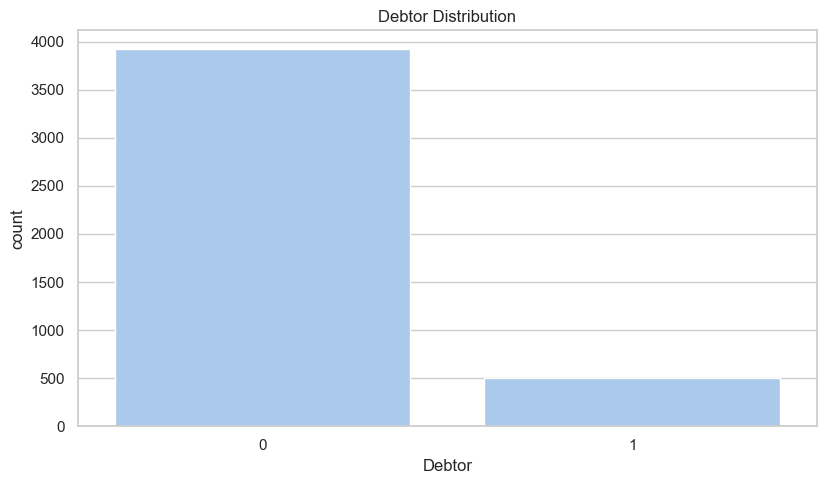

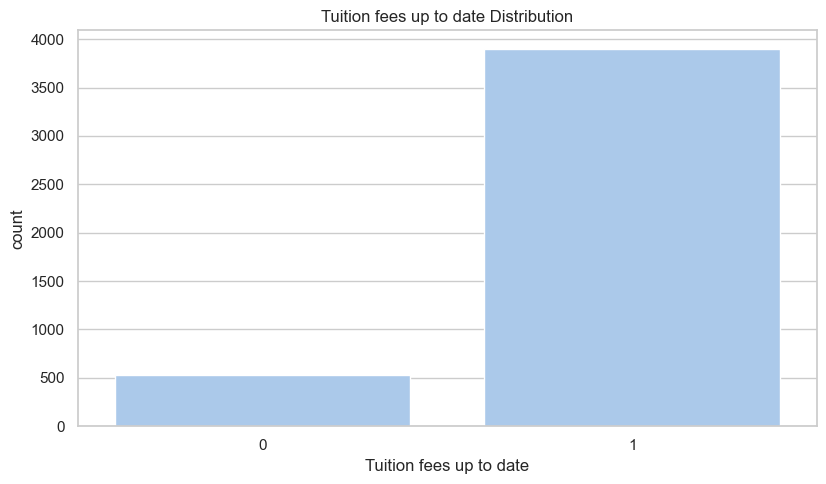

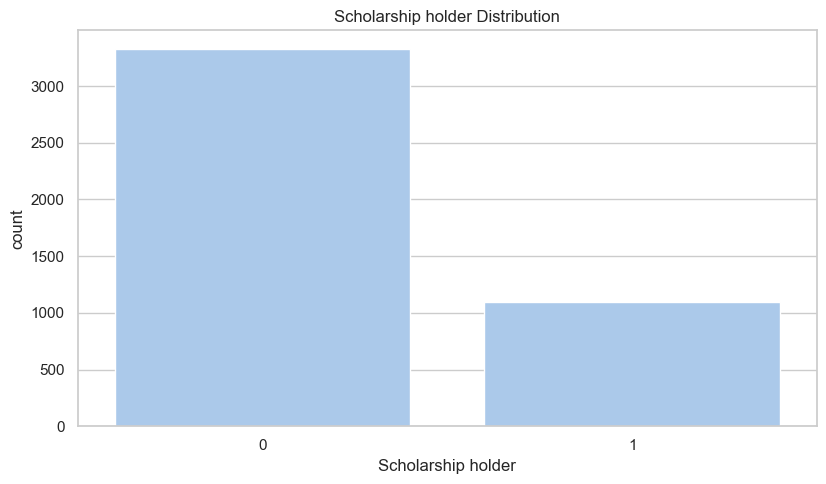

In [57]:
for var in socio_economic_vars:
    explore_variable(df, var, show_stats=False)

## Macro-economic data



Broader economic indicators at the time of enrollment, namely the **national unemployment rate** , **inflation rate**, and **GDP growth in the student’s enrollment year**. These vary across the 2008–2019 entry years (e.g. unemployment ranged ~7.6%–16.2% over
that period) .While not individual-specific, these features allow analysis of whether economic
climate correlates with dropout risk

In [60]:
macro_economic_vars = {
    'Unemployment rate': 'bar',
    'Inflation rate': 'bar',
    'GDP': 'bar',
}


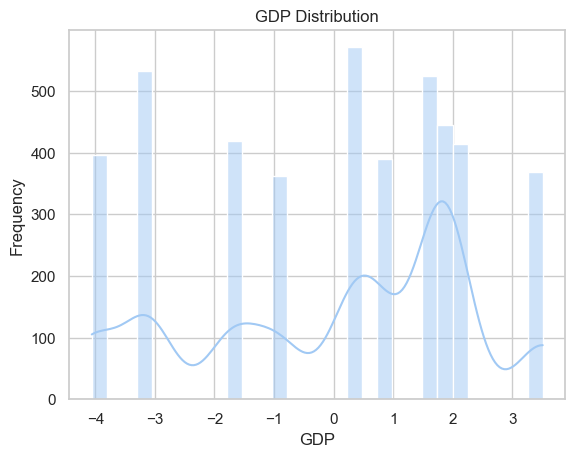

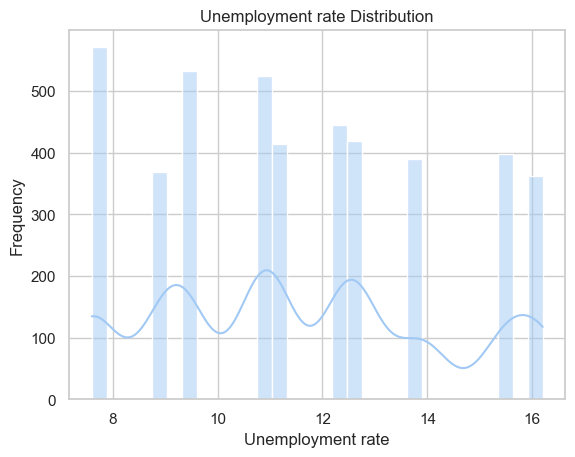

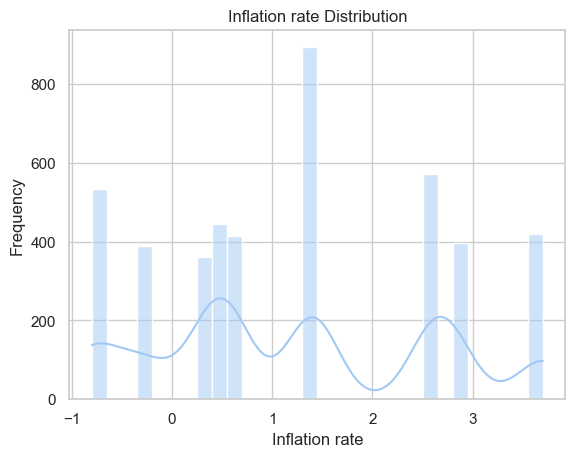

In [65]:
sns.histplot(df['GDP'], bins=30, kde=True)
plt.title("GDP Distribution")
plt.xlabel("GDP")
plt.ylabel("Frequency")
plt.show()

sns.histplot(df['Unemployment rate'], bins=30, kde=True)
plt.title("Unemployment rate Distribution")
plt.xlabel("Unemployment rate")
plt.ylabel("Frequency")
plt.show()

sns.histplot(df['Inflation rate'], bins=30, kde=True)
plt.title("Inflation rate Distribution")
plt.xlabel("Inflation rate")
plt.ylabel("Frequency")
plt.show()

## First-Year Academic Performance

Detailed performance after the 1st semester and 2nd semester of study. Key features include the **number of curricular units (courses) the student enrolled in**, **how many they passed (approved)**, **how many they failed or skipped (captured indirectly by “without evaluations”**, i.e. courses the student did not complete the evaluation), and the **average grade obtained** each semester 17 18. For context, students enrolled in about 6 courses on average in 1st semester and passed ~5 of them (median), with a mean first-sem GPA around 10.6 (on a 0–20 scale) 19 20 21. By second semester similar numbers hold (median ~5 courses passed) . These academic features serve as early indicators of success or difficulty

In [68]:
academic_performance_vars = {
    'Curricular units 1st sem (credited)': 'hist',
    'Curricular units 1st sem (enrolled)': 'hist',
    'Curricular units 1st sem (evaluations)': 'hist',
    'Curricular units 1st sem (approved)': 'hist',
    'Curricular units 1st sem (grade)': 'hist',  # continuous
    'Curricular units 1st sem (without evaluations)': 'hist',

    'Curricular units 2nd sem (credited)': 'hist',
    'Curricular units 2nd sem (enrolled)': 'hist',
    'Curricular units 2nd sem (evaluations)': 'hist',
    'Curricular units 2nd sem (approved)': 'hist',
    'Curricular units 2nd sem (grade)': 'hist',  # continuous
    'Curricular units 2nd sem (without evaluations)': 'hist',
}


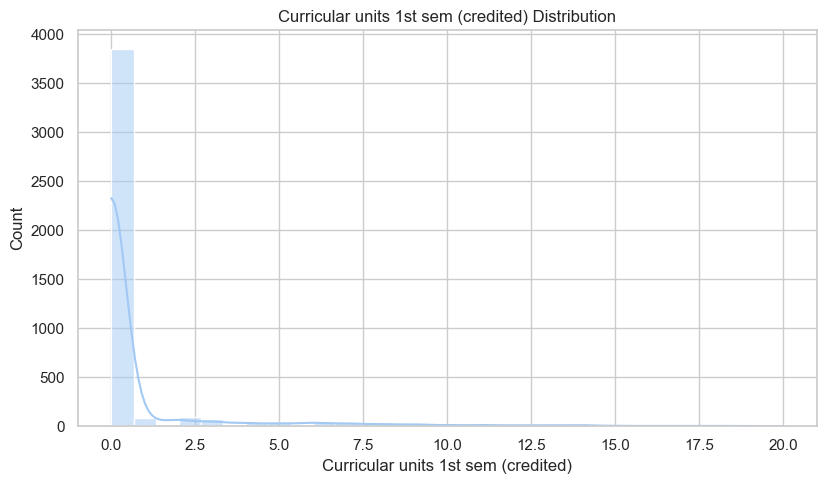

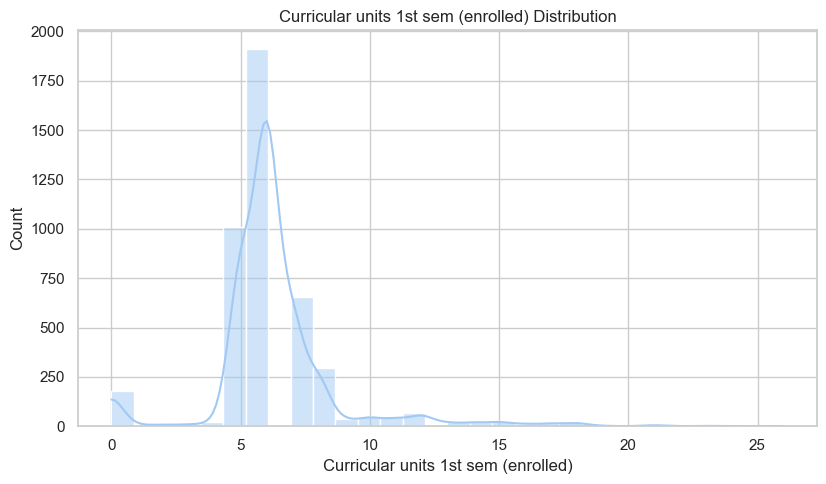

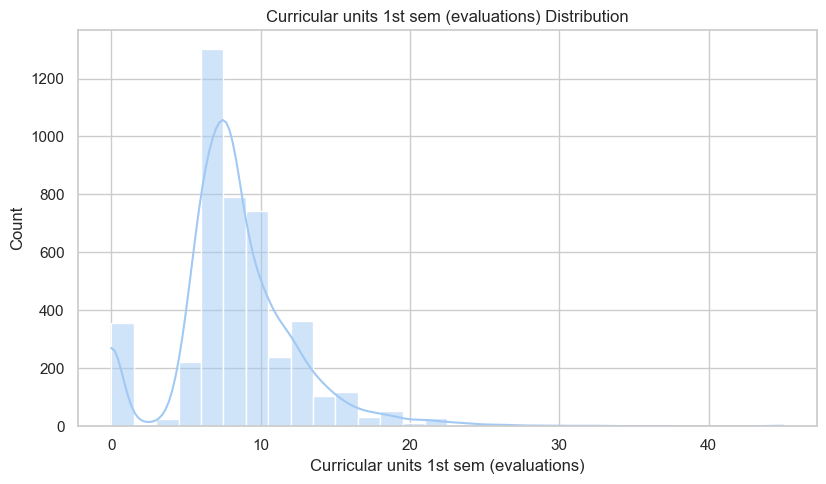

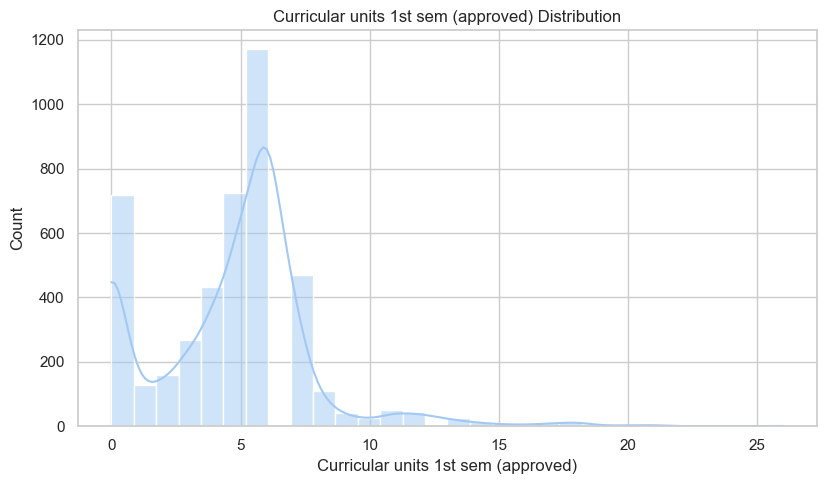

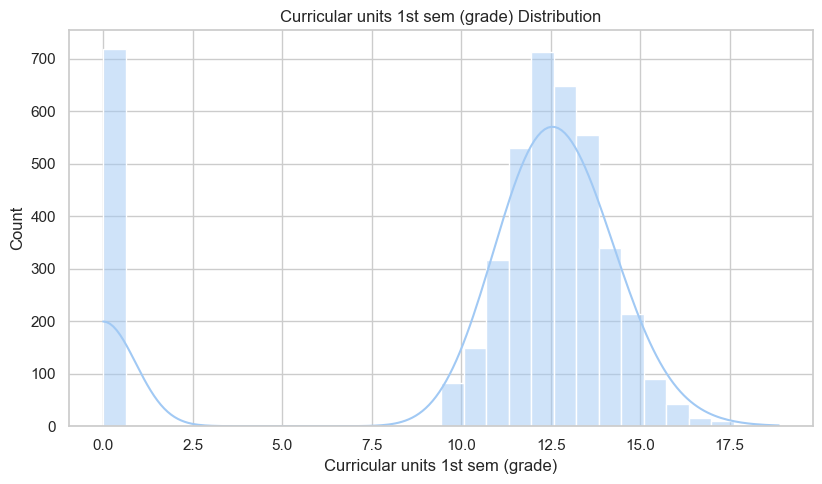

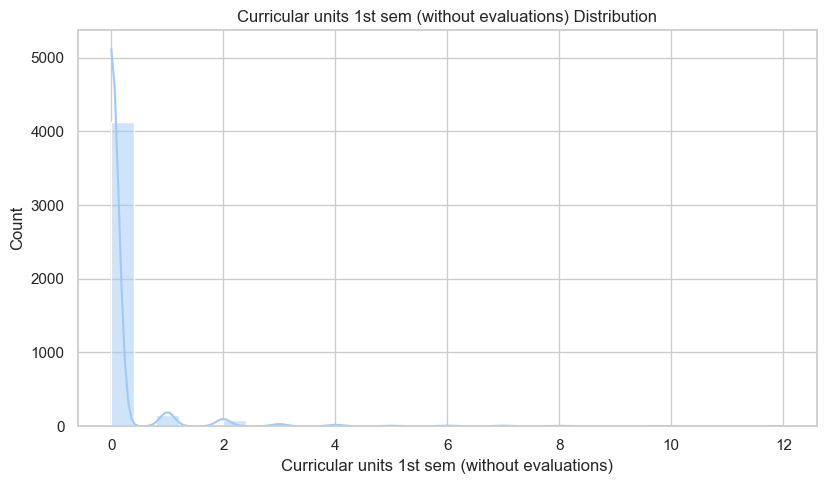

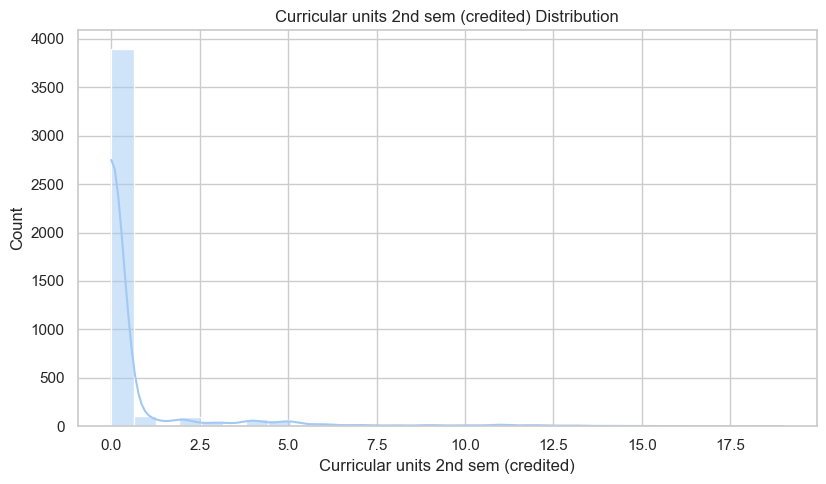

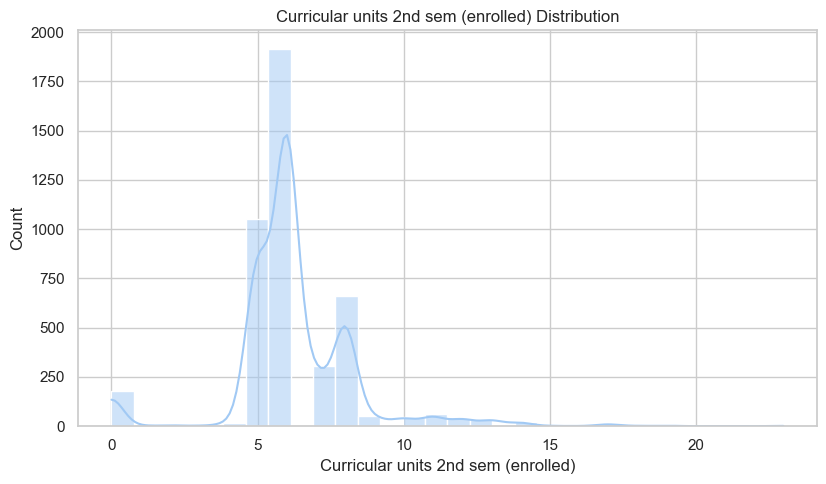

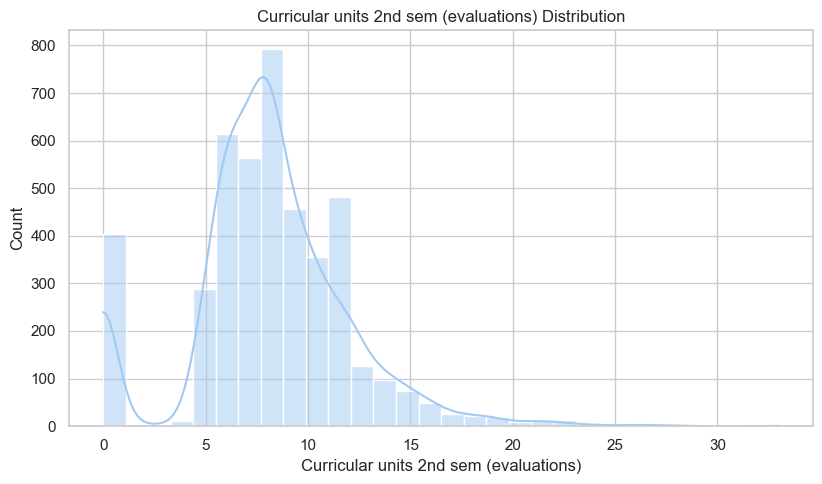

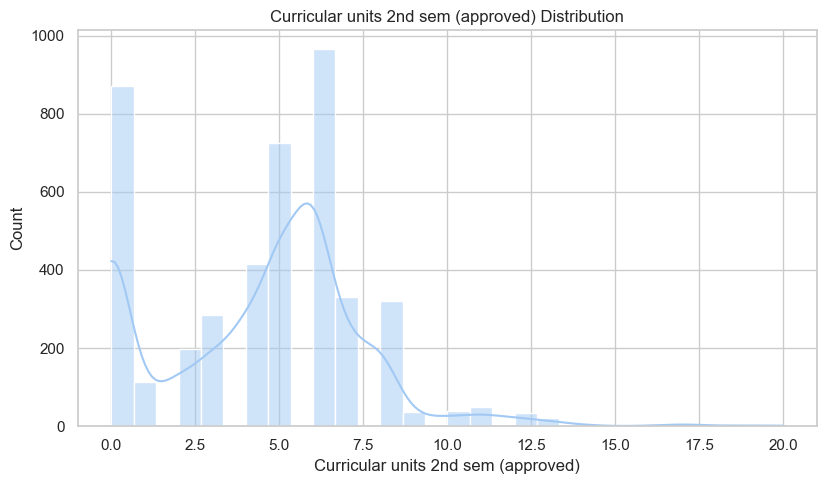

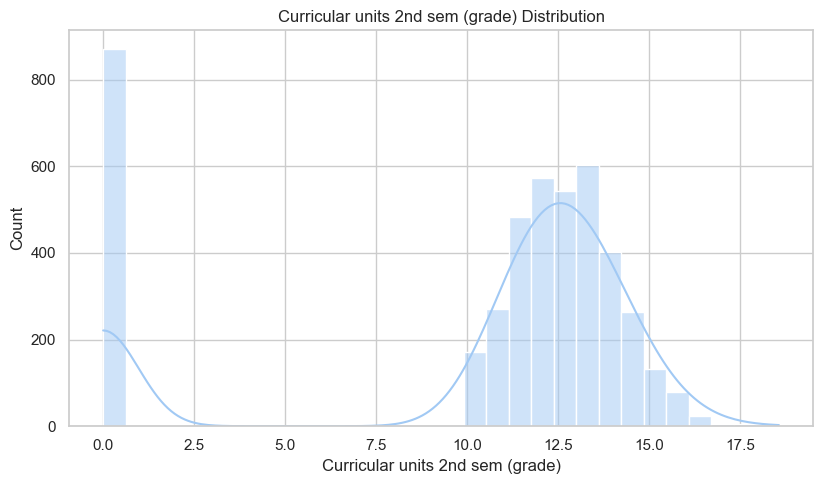

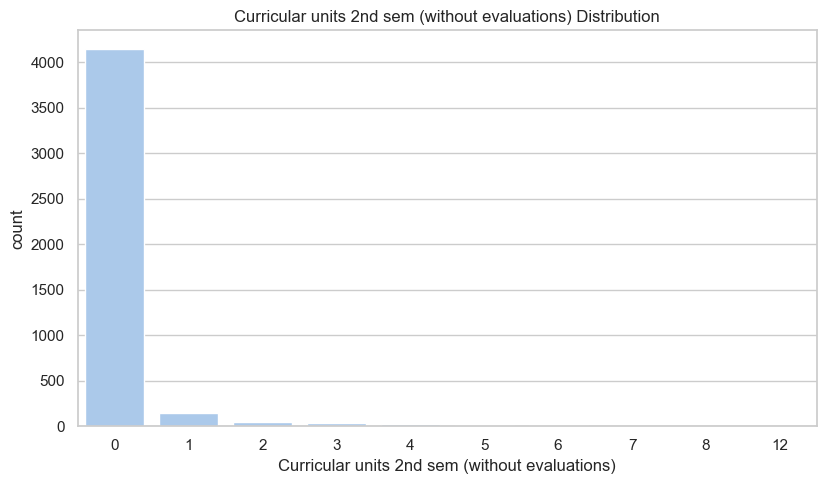

In [69]:
for var in academic_performance_vars:
    explore_variable(df, var, show_stats=False)